## <b>Understanding Feedforward Neural Network</b>

In this lab, you are required to build 3 Feedforward Neural Networks to simulate function
<br> $y = xsin( \frac {x^2} {300})$
<br> in range x: +-100
<br> You need to have a different structure for each model you build.

##Requirements

1 You are required to finish each part below following instructions.
<br>2 You may work on native py files, but your work needs to include same documentation. You may use pytorch or tensorflow keras.
<br>3 You may work in a group of 2.

<br><b>For submission, submit a link to your github repo</b>
<br>All student in the group must submit.

#### Part 1 data preparation

In the cell below, generate training data for your model.
<br> Generate a decent amount of training data in the interval of x.
<br>
<br> Since we are only approximating a function, data can be generated by plug in x value and get corresponding y value.
<br>You may use the way to generate data as in file Introduction_to_Artificial_Neural_Network.ipynb ([np.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html))
<br>
<br>All data need to be separated by the same distance.
<br>Ex:if you select an intervel from -100 to +100, and a total of 10001 data points, each x coordinate should be separated by 0.02


In [1]:

import numpy as np

# Set the range for x
x_min = -100
x_max = 100

# Set the number of data points
num_points = 10001

# Generate evenly spaced values for x
x = np.linspace(x_min, x_max, num_points)

# Calculate the corresponding y values
y = x * np.sin(x / 300)

# Combine x and y into a single array
data = np.column_stack((x, y))



#### Part 2 build models

In the cells below, build your models and train it with data from part1.
<br>
<br> You may use the model built in file Introduction_to_Artificial_Neural_Network.ipynb and change number of layers, number of neurons in each layer, activation function, loss function (loss), batch size, and/or epochs of the model. Or you can build your own model from scratch.
<br>
<br>Observe the change in training process (training time, accuracy changing rate) and final results when you change the parameters.
<br>
<br>You need to split your training data to two parts. With 40% used in training, and 60% used in test. You may do this with sklearn's [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) or keras' [validation_split](https://keras.io/api/models/model_training_apis/#fit-method) parameter in fit method together with train_test_split().

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Generate the data
x_min = -100
x_max = 100
num_points = 10001
x = np.linspace(x_min, x_max, num_points)
y = x * np.sin(x / 300)
data = np.column_stack((x, y))

# Split the data into training and testing sets
X = data[:, 0]
Y = data[:, 1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.6, random_state=42)

# model 1
model1 = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(1,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])
model1.compile(optimizer='adam', loss='mse')
model1.fit(X_train.reshape(-1, 1), Y_train, epochs=100, batch_size=32, validation_data=(X_test.reshape(-1, 1), Y_test))






Epoch 1/100
125/125 [==============================] - 5s 14ms/step - loss: 18.1279 - val_loss: 12.8530
Epoch 2/100
125/125 [==============================] - 1s 5ms/step - loss: 12.1194 - val_loss: 11.2509
Epoch 3/100
125/125 [==============================] - 1s 8ms/step - loss: 10.7731 - val_loss: 10.1903
Epoch 4/100
125/125 [==============================] - 1s 4ms/step - loss: 9.2293 - val_loss: 8.2567
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 7.7391 - val_loss: 7.3461
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 6.2356 - val_loss: 5.3651
Epoch 7/100
125/125 [==============================] - 0s 4ms/step - loss: 4.8331 - val_loss: 4.5477
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 3.5878 - val_loss: 3.1785
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - loss: 2.7118 - val_loss: 2.3266
Epoch 10/100
125/125 [==============================] - 0s 3ms/step - loss: 2.0242 -

In [4]:
# model 2
model2 = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(1,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])
model2.compile(optimizer='adam', loss='mse')
model2.fit(X_train.reshape(-1, 1), Y_train, epochs=100, batch_size=32, validation_data=(X_test.reshape(-1, 1), Y_test))



Epoch 1/100
125/125 [==============================] - 5s 13ms/step - loss: 18.8364 - val_loss: 11.6087
Epoch 2/100
125/125 [==============================] - 1s 4ms/step - loss: 10.9603 - val_loss: 8.8348
Epoch 3/100
125/125 [==============================] - 0s 4ms/step - loss: 7.5614 - val_loss: 5.2024
Epoch 4/100
125/125 [==============================] - 1s 4ms/step - loss: 3.8070 - val_loss: 2.9966
Epoch 5/100
125/125 [==============================] - 0s 4ms/step - loss: 1.5936 - val_loss: 1.9803
Epoch 6/100
125/125 [==============================] - 0s 4ms/step - loss: 0.6923 - val_loss: 0.2934
Epoch 7/100
125/125 [==============================] - 0s 4ms/step - loss: 0.2591 - val_loss: 0.1698
Epoch 8/100
125/125 [==============================] - 0s 4ms/step - loss: 0.2978 - val_loss: 0.5337
Epoch 9/100
125/125 [==============================] - 0s 4ms/step - loss: 0.1722 - val_loss: 0.1447
Epoch 10/100
125/125 [==============================] - 0s 4ms/step - loss: 0.1770 - va

In [5]:
# model 3
model3 = keras.Sequential([
    layers.Dense(64, activation='tanh', input_shape=(1,)),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(1, activation='linear')
])
model3.compile(optimizer='adam', loss='huber')
model3.fit(X_train.reshape(-1, 1), Y_train, epochs=100, batch_size=32, validation_data=(X_test.reshape(-1, 1), Y_test))



Epoch 1/100
125/125 [==============================] - 1s 5ms/step - loss: 8.9200 - val_loss: 8.5072
Epoch 2/100
125/125 [==============================] - 1s 4ms/step - loss: 7.9874 - val_loss: 7.5676
Epoch 3/100
125/125 [==============================] - 1s 4ms/step - loss: 6.5027 - val_loss: 5.3685
Epoch 4/100
125/125 [==============================] - 1s 4ms/step - loss: 4.2806 - val_loss: 3.4071
Epoch 5/100
125/125 [==============================] - 1s 4ms/step - loss: 2.8042 - val_loss: 2.3695
Epoch 6/100
125/125 [==============================] - 1s 7ms/step - loss: 2.0053 - val_loss: 1.6937
Epoch 7/100
125/125 [==============================] - 1s 5ms/step - loss: 1.4777 - val_loss: 1.2859
Epoch 8/100
125/125 [==============================] - 1s 6ms/step - loss: 1.1440 - val_loss: 0.9728
Epoch 9/100
125/125 [==============================] - 1s 5ms/step - loss: 0.8674 - val_loss: 0.7771
Epoch 10/100
125/125 [==============================] - 0s 4ms/step - loss: 0.7009 - val_lo

#### Part 3 model evaluation

In the cells below, eval your model with training data, test data ( with [model.evaluate()](https://keras.io/api/models/model_training_apis/#evaluate-method) ), and plot your predict result on the same plot with the plot of goal function.

Model 1 - Train Loss: 0.0122, Test Loss: 0.0115
Model 2 - Train Loss: 0.0144, Test Loss: 0.0143
Model 3 - Train Loss: 0.0084, Test Loss: 0.0090
32/32 [==============================] - 0s 1ms/step


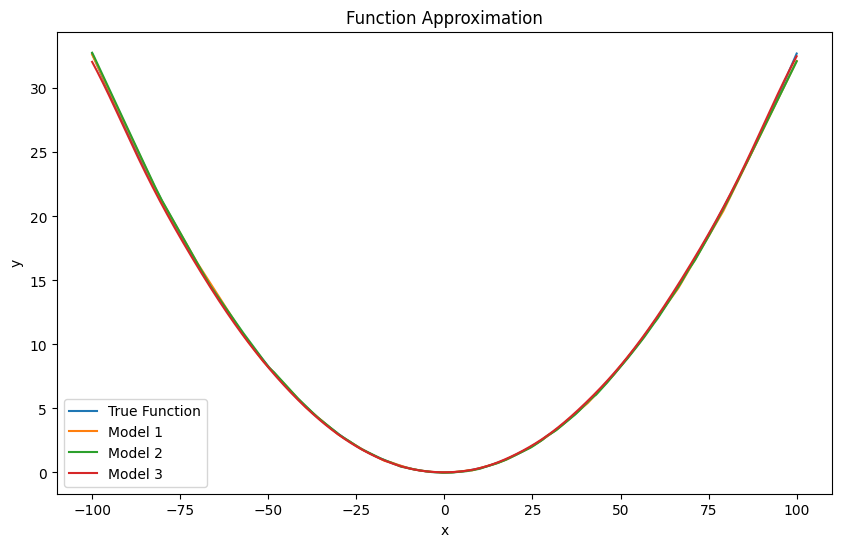

In [6]:

import matplotlib.pyplot as plt

# Evaluate the models on the training and testing data
train_loss1 = model1.evaluate(X_train.reshape(-1, 1), Y_train, verbose=0)
test_loss1 = model1.evaluate(X_test.reshape(-1, 1), Y_test, verbose=0)
print(f"Model 1 - Train Loss: {train_loss1:.4f}, Test Loss: {test_loss1:.4f}")

train_loss2 = model2.evaluate(X_train.reshape(-1, 1), Y_train, verbose=0)
test_loss2 = model2.evaluate(X_test.reshape(-1, 1), Y_test, verbose=0)
print(f"Model 2 - Train Loss: {train_loss2:.4f}, Test Loss: {test_loss2:.4f}")

train_loss3 = model3.evaluate(X_train.reshape(-1, 1), Y_train, verbose=0)
test_loss3 = model3.evaluate(X_test.reshape(-1, 1), Y_test, verbose=0)
print(f"Model 3 - Train Loss: {train_loss3:.4f}, Test Loss: {test_loss3:.4f}")

# Plot the true function and the predicted results
x_plot = np.linspace(-100, 100, 1000)
y_true = x_plot * np.sin(x_plot / 300)

y_pred1 = model1.predict(x_plot.reshape(-1, 1))
y_pred2 = model2.predict(x_plot.reshape(-1, 1))
y_pred3 = model3.predict(x_plot.reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_true, label='True Function')
plt.plot(x_plot, y_pred1, label='Model 1')
plt.plot(x_plot, y_pred2, label='Model 2')
plt.plot(x_plot, y_pred3, label='Model 3')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function Approximation')
plt.legend()
plt.show()



#### Part 4 get model output and feedforward by yourself

Recall how a Feedforward Neural Network gets its output. Now choose your model with highest accuracy, and call [get_weights()](https://keras.io/api/layers/base_layer/#get_weights-method) to get its weights and bias.
<br>
<br> Hint: bias and weights have different dimensions in most cases. Try to guess which index represent bias before you look it up on the internet.

<br> Afterwards, choose 5 data from your training dataset, do all the necessary calculations (with program of course), and get the output of your model. Compare it to the [model.predict()](https://keras.io/api/models/model_training_apis/#predict-method) result.
<br> They should be identical for the first several digitals, if not for all digits.
<br>
<br> If you do not know what are the necessary calculations, they are the steps mentioned in file Introduction_to_Artificial_Neural_Network.ipynb
<br> Matrix transpose can be done easily with [pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html) or [numpy](https://numpy.org/doc/stable/reference/generated/numpy.matrix.transpose.html). Activation functions can be applied with [keras' activation functions](https://keras.io/api/layers/activations/#available-activations).


In [7]:
model_2_weight_bias = model2.get_weights()
model_2_layers = []

for layer in model2.layers:
    weights_biases = layer.get_weights()  # This is a list where element 0 is weights and element 1 is biases
    if weights_biases:  # Some layers do not have weights
        model_2_layers.append({
            "weights": weights_biases[0],
            "biases": weights_biases[1],
            "activation": layer.activation
        })
# import numpy as np
# from tensorflow.keras import activations

# test_losses = [test_loss1, test_loss2, test_loss3]
# best_model_index = np.argmin(test_losses)

# if best_model_index == 0:
#     best_model = model1
#     print("Model 1 has the highest accuracy.")
# elif best_model_index == 1:
#     best_model = model2
#     print("Model 2 has the highest accuracy.")
# else:
#     best_model = model3
#     print("Model 3 has the highest accuracy.")

# weights, biases = [], []
# for layer in best_model.layers:
#     weights.append(layer.get_weights()[0])
#     biases.append(layer.get_weights()[1])

# # Select 5 data points from the training dataset
# X_sample = X_train[:5]
# Y_sample = Y_train[:5]

# # Perform the feedforward calculation manually
# for i in range(5):
#     x = X_sample[i]
#     y_true = Y_sample[i]

#     # Feedforward calculation
#     a = np.array([[x]])  # Reshape the input to have shape (1, 1)
#     for w, b in zip(weights, biases):
#         z = np.dot(w, a) + b
#         a = activations.relu(z)
#     y_pred = a[0][0]  # Get the scalar value from the flattened output

#     print(f"Sample {i+1}: X = {x:.2f}, Y_true = {y_true:.2f}, Y_pred (manual) = {y_pred:.2f}, Y_pred (model) = {best_model.predict(np.array([[x]]))[0][0]:.2f}")